# When are the Best Times to go to the Gym?

Using the data I've scraped from the gym's website, I'm going to use panda's DataFrames along with data visulatisation tools from matplotlib in order to gather insights and ultimately find the optimum times for the gym. Optimum times are defined by the times where the gym is least busy. 

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Sorting the Data
Firstly I'll import the csv file of the gym data which I've scraped from the PureGym website. This file simply 
shows the number of people in the gym at certain times throughout the day. The aim is to gather a large enough data set
to be able to decipher when the optimum gym times are (least number of people in the gym).

In [12]:
gym_data = pd.read_csv('/Users/isaaccoleman/PycharmProjects/Puregym/data.csv')

Below, we produce a pivot table with the days of the week as the index, the times throughout the day as columns and 
the mean number of people in the gym as the values. There are NaN values on Saturday and Sunday as the opening/closing times on 
the weekends differ from the weekdays (Weekdays 06:00 - 22:00 / Weekends 08:00 - 20:00).

In [13]:
days = ['Monday','Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
mean_members = np.round(gym_data.pivot_table(values='Number', index='Day', columns='Time'), 1)
mean_members = mean_members.reindex(days)
print(mean_members)

Time       06:30  07:00  07:30  08:00  08:30  09:00  09:30  10:00  10:30  \
Day                                                                        
Monday      16.0   24.0   30.5   30.5   21.5   25.5   26.5   31.5   31.0   
Tuesday     23.0   46.0   49.5   43.5   36.0   33.5   31.5   31.0   28.5   
Wednesday   23.0   39.5   45.5   42.5   33.5   30.0   30.0   32.5   32.0   
Thursday    23.0   40.0   35.0   41.0   32.0   34.0   35.0   37.0   43.0   
Friday      18.0   22.0   28.0   35.0   32.0   41.0   38.0   27.0   31.0   
Saturday     NaN    NaN    NaN    NaN   17.0   23.0   35.0   42.0   52.0   
Sunday       NaN    NaN    NaN    NaN   13.0   22.5   24.5   27.5   41.0   

Time       11:00  ...  18:00  18:30  19:00  19:30  20:00  20:30  21:00  21:30  \
Day               ...                                                           
Monday      35.0  ...   61.0   75.7   78.3   79.0   74.0   62.0   53.3   35.0   
Tuesday     32.0  ...   68.0   76.0   93.3   90.7   64.7   56.0   51.0  

Now I'm going to plot a bar chart of the number of people in the gym against the time throughout the day. This will be
a general graph of all the data (not day-specific).

I have highlighted the bars (with the colour green) that have a value of less than 40 people in the gym.

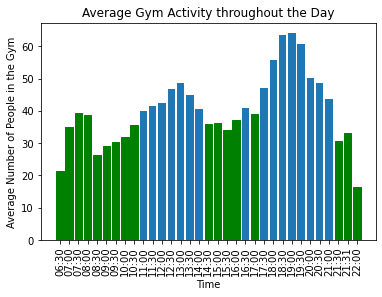

In [14]:
average_day = gym_data.pivot_table(index='Time', values='Number')
ax = plt.axes()

bar_chart = plt.bar(x=average_day.index, height=[i[0] for i in average_day.values])
ax.set_xticks(average_day.index)
ax.set_xticklabels(average_day.index, rotation=90)
plt.xlabel('Time')
plt.ylabel('Average Number of People in the Gym')
plt.title('Average Gym Activity throughout the Day')

# Highlighting the bars at the times where the number of people in the gym is less than 40
for i in range(len(average_day.values)):
    if average_day.values[i] < 40:
        bar_chart[i].set_color('g')
plt.show()

## Optimum Times for Each Day

The graph above represents the average number of people at the gym throughout a generic day. We would like to look 
at the data in relation to specific days and find the optimum times (least number of people in the gym). Most
people at the gym tend to have a schedule and go to the gym at the same day/times each week. Using the data, I can find the trends of the times on each day of the week where the gym is most empty.
I have created a table with the index as the days of the week and five columns that represent the top five optimum times for the gym. Each value consists of the time with the number of people in the gym at that time.

In [15]:
column = ['Best', 'Second', 'Third', 'Fourth', 'Fifth']
times = [i for i in mean_members.columns]

optimum_times = pd.DataFrame(columns=column)

for i in days:
    df_nan = mean_members.loc[i]
    df = df_nan.dropna()
    
    # creating a list where each element consists of a sublist with two elements: the first element - time, 
    # and the second element - the number of people in the gym
    lst=[]
    for j in range(len(df_nan)):
        pair = [times[j], df_nan[j]]
        lst.append(pair)
        lst = sorted(lst, key=lambda x: x[1])
    
    # sorting the list in order of least number of people in the gym
    lst = sorted(lst, key=lambda x: x[1])
    
    # Taking into account the different opening times - because weekend days will have NaN values at the beginning
    # of the list during the times when the gym isn't open
    if i != 'Saturday' and i != 'Sunday':
        new_row = {'Best':lst[0], 'Second':lst[1], 'Third':lst[2], 'Fourth':lst[3], 'Fifth':lst[4]}
        optimum_times = optimum_times.append(new_row, ignore_index=True)
    else:
        new_row = {'Best':lst[4], 'Second':lst[5], 'Third':lst[6], 'Fourth':lst[7], 'Fifth':lst[8]}
        optimum_times = optimum_times.append(new_row, ignore_index=True)

optimum_times['Days'] = days
optimum_times = optimum_times.set_index('Days')
print(optimum_times.to_string())

                    Best         Second          Third         Fourth          Fifth
Days                                                                                
Monday     [06:30, 16.0]  [08:30, 21.5]  [07:00, 24.0]  [09:00, 25.5]  [09:30, 26.5]
Tuesday    [06:30, 23.0]  [10:30, 28.5]  [10:00, 31.0]  [09:30, 31.5]  [11:00, 32.0]
Wednesday  [06:30, 23.0]  [16:00, 29.3]  [11:30, 29.5]  [09:00, 30.0]  [09:30, 30.0]
Thursday   [06:30, 23.0]  [15:30, 29.2]  [21:30, 30.2]  [08:30, 32.0]  [16:00, 33.8]
Friday     [06:30, 18.0]  [07:00, 22.0]  [21:30, 23.7]  [10:00, 27.0]  [07:30, 28.0]
Saturday   [20:00, 15.0]  [08:30, 17.0]  [09:00, 23.0]  [18:00, 23.0]  [19:30, 25.0]
Sunday     [08:30, 13.0]  [20:00, 15.5]  [09:00, 22.5]  [09:30, 24.5]  [10:00, 27.5]


## Finding the Best Combination of Days

My schedule consists of going to the gym between 14:00-16:00, three times a week, with a day of rest in between each session. I currently go to the gym on Monday, Wednesday and Friday (for no particular reason). I'd like to see if 
Tuesday, Thursday, Saturday are a better combination of days with regards to the number of people in the gym. 
I'm going to compare Monday with Tuesday, Wednesday with Thursday and Friday with Saturday.

#### Monday vs Tuesday
(20/08/2001) I've noticed that for most of the day, Monday has less people
in the gym than on Tuesday, however the only times when Tuesday has (about 10) fewer people is 14:00 - 17:00 which is my 
preferred time to go - Thus, Tuesday wins.

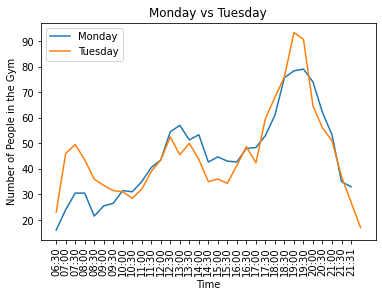

In [16]:
fig = plt.figure()
ax = fig.add_subplot()

monday = gym_data[gym_data['Day'] == 'Monday'].pivot_table(index='Time', values='Number')
plt.plot(monday.index, [i[0] for i in monday.values], label='Monday')

tuesday = gym_data[gym_data['Day'] == 'Tuesday'].pivot_table(index='Time', values='Number')
plt.plot(tuesday.index, [i[0] for i in tuesday.values], label='Tuesday')

ax.set_xticks(monday.index)
ax.set_xticklabels(monday.index, rotation=90)
ax.set_xlabel('Time')
ax.set_ylabel('Number of People in the Gym')
ax.set_title('Monday vs Tuesday')
ax.legend()
plt.show()

#### Wednesday vs Thursday

(20/08/2001) From 13:30-14:30 Wednesday has fewer people than Thursday, but from 14:30-18:00 Thursday prevails. However, the 
difference in numbers is very small (3-5 people) for my preferred times. What stands out to me is that, for both days, 15:00 is
the sweet spot where there are about 30 people in the gym.

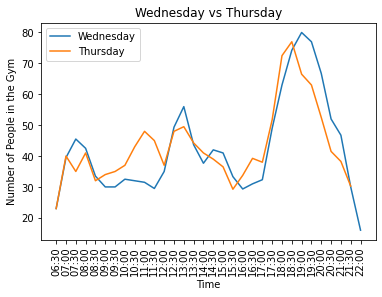

In [17]:
fig = plt.figure()
ax = fig.add_subplot()

monday = gym_data[gym_data['Day'] == 'Wednesday'].pivot_table(index='Time', values='Number')
plt.plot(monday.index, [i[0] for i in monday.values], label='Wednesday')

tuesday = gym_data[gym_data['Day'] == 'Thursday'].pivot_table(index='Time', values='Number')
plt.plot(tuesday.index, [i[0] for i in tuesday.values], label='Thursday')

ax.set_xticks(monday.index)
ax.set_xticklabels(monday.index, rotation=90)
ax.set_xlabel('Time')
ax.set_ylabel('Number of People in the Gym')
ax.set_title('Wednesday vs Thursday')
ax.legend()
plt.show()

It is also notable that, on a Wednesday from 9:00-12:00, there are usually less than 40 people in the gym (sometimes reaching 30). This is shown clearly in the comparison of the two day's bar charts below:

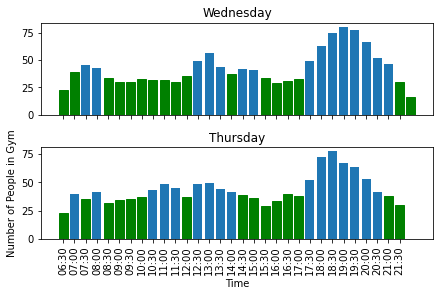

In [18]:
# Bar Chart Comparison
fig, ax = plt.subplots(2, sharex=True, constrained_layout=True)

wednesday = gym_data[gym_data['Day'] == 'Wednesday'].pivot_table(index='Time', values='Number')
bar_chart = ax[0].bar(x=wednesday.index, height=[i[0] for i in wednesday.values])
ax[0].set_xticks(wednesday.index)
ax[0].set_xticklabels(wednesday.index, rotation=90)
ax[0].set_title('Wednesday')
# Highlights the times (bars) where the number of people in the gym is less than 40
for i in range(len(wednesday.values)):
     if wednesday.values[i] < 40:
            bar_chart[i].set_color('g')

thursday = gym_data[gym_data['Day'] == 'Thursday'].pivot_table(index='Time', values='Number')
bar_chart = ax[1].bar(x=thursday.index, height=[i[0] for i in thursday.values])
ax[1].set_xticks(thursday.index)
ax[1].set_xticklabels(thursday.index, rotation=90)
ax[1].set_title('Thursday')
# Highlights the times (bars) where the number of people in the gym is less than 40
for i in range(len(thursday.values)):
    if thursday.values[i] < 40:
        bar_chart[i].set_color('g')


plt.ylabel('Number of People in Gym')
ax[1].set_xlabel('Time')
plt.show()

#### Friday vs Saturday

From the graph below, Saturday seems to have the edge over Friday during my preferred times of 14:00-16:00, although it's not significant (1-4 people difference).
The graph also shows that the gym seems to be very quiet on Saturday mornings (8:00-9:30) and evenings (17:00-20:00) with there being less than 30 people in the gym at a time. 

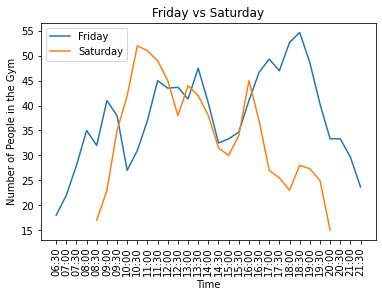

In [19]:
fig = plt.figure()
ax = fig.add_subplot()

monday = gym_data[gym_data['Day'] == 'Friday'].pivot_table(index='Time', values='Number')
plt.plot(monday.index, [i[0] for i in monday.values], label='Friday')

tuesday = gym_data[gym_data['Day'] == 'Saturday'].pivot_table(index='Time', values='Number')
plt.plot(tuesday.index, [i[0] for i in tuesday.values], label='Saturday')

ax.set_xticks(monday.index)
ax.set_xticklabels(monday.index, rotation=90)
ax.set_xlabel('Time')
ax.set_ylabel('Number of People in the Gym')
ax.set_title('Friday vs Saturday')
ax.legend()
plt.show()

(20/08/2001) After looking at the comparisons of Mon/Wed/Fri vs Tues/Thurs/Fri, I can say that they follow very 
similar trends throughout the day with small differences. With regards to my preferred time of 14:00 - 17:00, the combination of Tues/Thurs/Fri is better than Mon/Wed/Fri for each day. However, it is clear that the true optimum times mostly occur in the mornings before 11:00 with about 20-30 people in the gym.

## Limitations
At the time of writing this, I only have three weeks worth of data. I believe that for this particular project the length of data collection (three weeks) is satisfactory as it's a fair assumption that many people tend to go to the gym at the same days and times throughout the week, following a strict schedule. This means that I'm able to quickly find trends in the data and use this information immediately. However, this lack of data means that I can't account for trends throughout different months or seasons. For example, the gym may be more busy in the winter months as there are less people on holiday or more people gearing up for their 'summer-body'. Additionally, the month of January may be busier than usual due to the 'New years resolution' mindset.

In my gym there are fitness classes available throughout the day. These classes occur in separate rooms away from the parts of the gym that I tend to use. A lot of the classes have up to 20 spaces available at a time. Thus, there may be some inflated values. For example, if there are 50 people in the gym with a 20-person fitness class, it effectively feels like 30 people in the gym which is 40% less than the current number of people in the gym. 
The website allows you to sign up for these classes, however you're unable to see how many people have signed up for each class. Therefore, I'm unable to incorporate this information into the code. 